In [32]:
############################ Data Analysis & Calculation ############################

import numpy as np 
import pandas as pd 

############################ Ignore Warning  ############################
import warnings
warnings.filterwarnings("ignore")

############################ Data visualization ############################

import seaborn as sns
import matplotlib.pyplot as plt


# 1. Data Importing

In [33]:
import pandas as pd
telcom = pd.read_csv (r"C:\Users\ganes\Downloads\churn (3).csv")
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Data Manipulation

#### Removing Irrelavent Variable


In [34]:
telcom = telcom.drop('customerID',axis=1)

#### 2.1. Data Type and conversion

In [35]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [36]:
telcom.TotalCharges.value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [37]:
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan).astype(float)

In [38]:
telcom.TotalCharges.value_counts(dropna=False)

TotalCharges
NaN        11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6531, dtype: int64

# 3. Missing Value Identify & Treatment

In [39]:
telcom.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [40]:
print(telcom.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


# 4.Outlier identify & Treatment 

<Axes: ylabel='TotalCharges'>

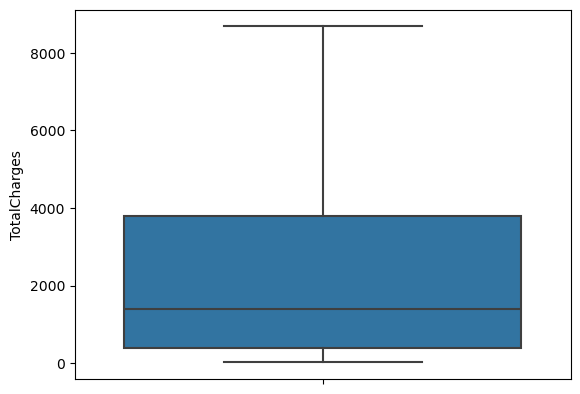

In [41]:
sns.boxplot(y=telcom.TotalCharges)  # Single Variable

<Axes: ylabel='MonthlyCharges'>

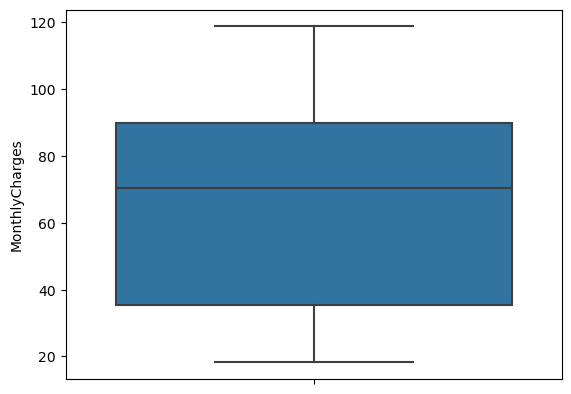

In [42]:
sns.boxplot(y=telcom.MonthlyCharges)  # Single Variable

<Axes: ylabel='tenure'>

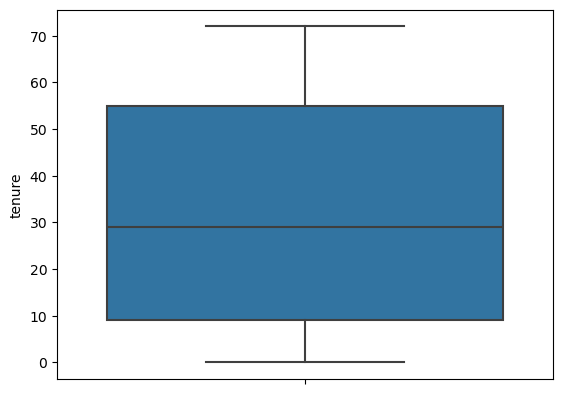

In [43]:
sns.boxplot(y=telcom.tenure)  # Single Variable

#### 2.2. Data Manipulation

In [44]:
telcom.SeniorCitizen = telcom.SeniorCitizen.replace({1:"Yes",0:"No"})

In [45]:
telcom.OnlineSecurity.value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [46]:
telcom.OnlineSecurity = telcom.OnlineSecurity.replace({'No internet service' : 'No'})
telcom.OnlineBackup   = telcom.OnlineBackup.replace({'No internet service' : 'No'})
telcom.DeviceProtection = telcom.DeviceProtection.replace({'No internet service' : 'No'})
telcom.TechSupport = telcom.TechSupport.replace({'No internet service' : 'No'})
telcom.StreamingTV = telcom.StreamingTV.replace({'No internet service' : 'No'})
telcom.StreamingMovies = telcom.StreamingMovies.replace({'No internet service' : 'No'})
telcom.MultipleLines = telcom.MultipleLines.replace({'No phone service' : 'No'})

In [47]:
telcom.OnlineSecurity.value_counts()

OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

In [48]:
def tenure_lab(telcom) :
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_13-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_25-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_49-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"

    
telcom["tenure_group"] = telcom.apply(lambda x:tenure_lab(x),axis = 1)

In [49]:
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_25-48
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,Male,No,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,Tenure_25-48
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


# Data Visualization

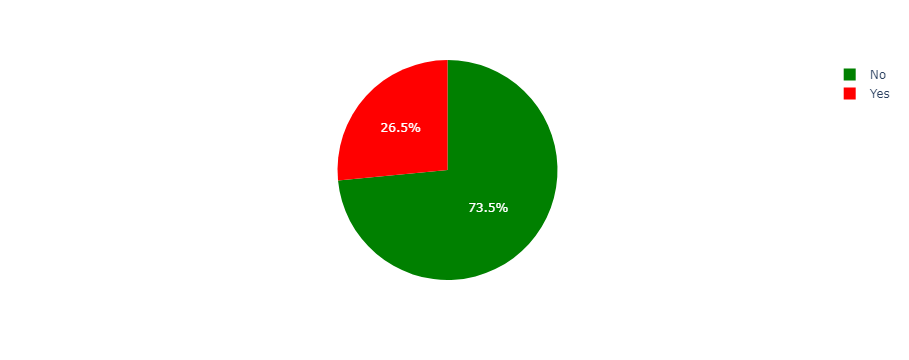

In [50]:
import plotly.express as px

fig = px.pie(telcom,names='Churn',color='Churn',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

# 5.Labeling the data 

In [51]:
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_25-48
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,Male,No,No,No,45,No,No,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,Tenure_25-48
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


In [52]:
telcom_num = telcom.select_dtypes(include=[np.number])
telcom_num.head(3)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15


In [53]:
telcom_dummies = telcom.select_dtypes(include=['object'])
telcom_dummies.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_group
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,Tenure_0-12
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,Tenure_25-48
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,Tenure_0-12


In [54]:
from sklearn.preprocessing import LabelEncoder
telcom_dummies = telcom_dummies.apply(LabelEncoder().fit_transform)
telcom_dummies.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_group
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0,2
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1,0


In [55]:
telcom = pd.concat([telcom_num, telcom_dummies],axis=1)
telcom.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_group
0,1,29.85,29.85,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,2,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,3,0,2
2,2,53.85,108.15,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,3,1,0
3,45,42.30,1840.75,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,2
4,2,70.70,151.65,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,2,1,0


# Data Partition 

In [56]:
from sklearn.model_selection import train_test_split

X = telcom.drop('Churn', axis = 1)
Y = telcom[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [57]:
telcom.shape

(7043, 21)

In [58]:
X_test.shape

(2113, 20)

# Model -- Random Forest 

In [30]:
from sklearn.ensemble import RandomForestRegressor  # y = Number
from sklearn.ensemble import RandomForestClassifier # y = Category

# by default 100 tree will be form 
Model = RandomForestClassifier(random_state=20,
                               n_estimators=25, # make 25 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Importance Features

In [31]:
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG")

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

#### Top 5 Variable are    
    * Contract 
    * Tenure
    * MonthlyCharger
    * TotalCharger
    * InternetService


# Random Forest Visualization

!pip install pydot

from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
feature_list = list(X.columns)  # all independent variable name
Churn = ['No','Yes'] 


tree.plot_tree(Model.estimators_[0],
               feature_names = feature_list, 
                class_names = Churn,
                rounded = True, 
                filled=True,
              fontsize=3)
fig.savefig('rf_individualtree.png')

In [59]:
from sklearn.tree import export_graphviz
import pydot

feature_list = list(X.columns)  # all independent variable name
Churn = ['No','Yes'] 

tree = Model.estimators_[0]  # 0-24 specify the tree number   

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                class_names = Churn,
                rounded = True, 
                filled=True)
(graph, ) = pydot.graph_from_dot_file('abc.dot')
graph.write_png('tree.png')


from IPython.display import Image
Image(filename = 'tree.png')

ModuleNotFoundError: No module named 'pydot'

# Step 6 : Predictions on Train Dataset

In [ ]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

In [ ]:
train['Predicted'] = Model.predict(X_train)
train.head()

# Step 7 : Model Performance Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Predicted'],train['Churn'])
print(confusion_matrix)

In [ ]:
Accuracy_Train = ((3388+556)/(4930)*100)
print(Accuracy_Train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['Churn'], train['Predicted']))

# Step 8 : Predictions on Test Dataset

In [ ]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

In [ ]:
test['Predicted'] = Model.predict(X_test)
test.head()

# Step 9 : Model Performance Metrics on Test data 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Churn'])
print(confusion_matrix)

In [ ]:
Accuracy_test=((1462+223)/(2113)*100)
Accuracy_test

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test['Churn'], test['Predicted']))

# Finish

# Grid Search Method 

In [ ]:
params = { 'min_samples_split': [350,200,250,100], ## Parent 
           'min_samples_leaf': [120,50,100], ## Child or Leave 
           'max_depth':[3,4,5]}  # Branches

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

In [ ]:
grid_search_cv.best_estimator_

# Business Use Case -- Live Data

In [ ]:
Live_data = X_test.iloc[0:4,:]
Live_data

In [ ]:
Live_data['Predicted'] = Model.predict(Live_data)
Live_data

* 0 = customer will not churn
* 1 = Customer will Churn ( keep a eye on this )

## Business Submission

#### Confusion Matrix on Train

In [ ]:
print(classification_report(train['Churn'], train['Predicted']))

#### Model Export  -- Python to Laptop

In [ ]:
import pickle

pickle.dump(Model, open(r'C:\Users\Hp\Desktop\Python Code\Random Forest by Irfan\RF_Model.pkl','wb'))  # Exporting model from python to laptop